In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, mean_squared_error
import seaborn as sns

# Read the CSV files into DataFrames
df1 = pd.read_csv('questionnaire.csv')
df2 = pd.read_csv('demographic.csv')
df3 = pd.read_csv('diet.csv')
df4 = pd.read_csv('examination.csv')

# Merge the DataFrames on the 'seqn' column
merged_df = df1.merge(df2, on='SEQN').merge(df3, on='SEQN').merge(df4, on='SEQN')

# Print the merged DataFrame
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(merged_df.shape)


(10175, 953)
(10175, 47)
(9813, 168)
(9813, 224)
(9813, 1389)


In [49]:
merged_df.isnull().sum()

SEQN           0
ACD011A     4250
ACD011B     9797
ACD011C     9649
ACD040      7506
            ... 
CSXSLTRT    8218
CSXSLTRG    8218
CSXNART     8200
CSXNARG     8200
CSAEFFRT    6276
Length: 1389, dtype: int64

In [50]:
# List of columns to keep
columns_to_keep = [
    'SEQN', 'RIAGENDR', 'RIDAGEYR', 'DMDEDUC2', 'BPXDI1', 'BPXDI3', 'BPXSY1', 'BPXSY3', 'PEASCST1', 'PEASCCT1', 'BMXBMI', 'BMXHT', 'BMXWAIST', 'BMXWT', 'BPQ080',
    'DRQSDIET', 'DRQSPREP', 'MCQ010', 'MCQ160F', 'CDQ001', 'OCQ210',
    'PAQ650', 'PAQ665', 'DPQ090', 'DPQ060', 'DPQ050', 'DPQ040', 'DPQ030', 'DPQ020','ALQ101','ALQ151', 'ALQ120Q', 'ALQ130', 'SMQ020', 'SMQ040', 'DBQ700', 'HSD010', 'SLD010H'
]

# Drop all columns except for the specified ones
merged_df = merged_df[columns_to_keep]

# Drop all rows where RIDAGEYR is less than 18
merged_df = merged_df[merged_df['RIDAGEYR'] >= 18]

merged_df.head()

,SEQN,RIAGENDR,RIDAGEYR,DMDEDUC2,BPXDI1,BPXDI3,BPXSY1,BPXSY3,PEASCST1,PEASCCT1,...,DPQ020,ALQ101,ALQ151,ALQ120Q,ALQ130,SMQ020,SMQ040,DBQ700,HSD010,SLD010H
0,73557,1,69,3.0,72.0,74.0,122.0,102.0,1,NaN,...,0.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,7.0
1,73558,1,54,3.0,62.0,42.0,156.0,156.0,1,NaN,...,0.0,1.0,1.0,7.0,4.0,1.0,2.0,3.0,4.0,9.0
2,73559,1,72,4.0,90.0,80.0,140.0,146.0,1,NaN,...,0.0,1.0,2.0,0.0,NaN,1.0,3.0,3.0,3.0,8.0
4,73561,2,73,5.0,86.0,86.0,136.0,142.0,1,NaN,...,1.0,1.0,2.0,0.0,NaN,2.0,NaN,2.0,5.0,9.0
5,73562,1,56,4.0,84.0,80.0,160.0,154.0,1,NaN,...,3.0,1.0,2.0,5.0,1.0,1.0,3.0,5.0,5.0,5.0


In [51]:
merged_df.isnull().sum()

SEQN           0
RIAGENDR       0
RIDAGEYR       0
DMDEDUC2     336
BPXDI1       498
BPXDI3       300
BPXSY1       498
BPXSY3       300
PEASCST1       0
PEASCCT1    5713
BMXBMI        77
BMXHT         67
BMXWAIST     337
BMXWT         64
BPQ080         0
DRQSDIET     528
DRQSPREP     528
MCQ010         0
MCQ160F      336
CDQ001      2216
OCQ210      4996
PAQ650         0
PAQ665         0
DPQ090       531
DPQ060       530
DPQ050       529
DPQ040       529
DPQ030       529
DPQ020       528
ALQ101       503
ALQ151      1447
ALQ120Q     1445
ALQ130      2328
SMQ020         0
SMQ040      3434
DBQ700         0
HSD010       480
SLD010H        3
dtype: int64

In [52]:
merged_df.loc[merged_df['ALQ101'] == 2, ['ALQ120Q', 'ALQ130']] = merged_df.loc[merged_df['ALQ101'] == 2, ['ALQ120Q', 'ALQ130']].fillna(0)
merged_df.loc[merged_df['ALQ101'] == 2, ['ALQ151']] = merged_df.loc[merged_df['ALQ101'] == 2, ['ALQ151']].fillna(2)

merged_df.loc[merged_df['SMQ020'] != 1, ['SMQ040']] = merged_df.loc[merged_df['SMQ020'] != 1, ['SMQ040']].fillna(3)

merged_df.loc[merged_df['ALQ120Q'] <= 3, ['ALQ130']] = merged_df.loc[merged_df['ALQ120Q'] <= 3, ['ALQ130']].fillna(0)

In [53]:
merged_df.isnull().sum()

SEQN           0
RIAGENDR       0
RIDAGEYR       0
DMDEDUC2     336
BPXDI1       498
BPXDI3       300
BPXSY1       498
BPXSY3       300
PEASCST1       0
PEASCCT1    5713
BMXBMI        77
BMXHT         67
BMXWAIST     337
BMXWT         64
BPQ080         0
DRQSDIET     528
DRQSPREP     528
MCQ010         0
MCQ160F      336
CDQ001      2216
OCQ210      4996
PAQ650         0
PAQ665         0
DPQ090       531
DPQ060       530
DPQ050       529
DPQ040       529
DPQ030       529
DPQ020       528
ALQ101       503
ALQ151       507
ALQ120Q      505
ALQ130       505
SMQ020         0
SMQ040         0
DBQ700         0
HSD010       480
SLD010H        3
dtype: int64

In [54]:
merged_df.notnull().sum()

SEQN        5924
RIAGENDR    5924
RIDAGEYR    5924
DMDEDUC2    5588
BPXDI1      5426
BPXDI3      5624
BPXSY1      5426
BPXSY3      5624
PEASCST1    5924
PEASCCT1     211
BMXBMI      5847
BMXHT       5857
BMXWAIST    5587
BMXWT       5860
BPQ080      5924
DRQSDIET    5396
DRQSPREP    5396
MCQ010      5924
MCQ160F     5588
CDQ001      3708
OCQ210       928
PAQ650      5924
PAQ665      5924
DPQ090      5393
DPQ060      5394
DPQ050      5395
DPQ040      5395
DPQ030      5395
DPQ020      5396
ALQ101      5421
ALQ151      5417
ALQ120Q     5419
ALQ130      5419
SMQ020      5924
SMQ040      5924
DBQ700      5924
HSD010      5444
SLD010H     5921
dtype: int64

In [55]:
# Drop all columns with less than 2000 non-null values
merged_df = merged_df.dropna(thresh=2000, axis=1)

# Print the resulting DataFrame
print(merged_df)

       SEQN  RIAGENDR  RIDAGEYR  DMDEDUC2  BPXDI1  BPXDI3  BPXSY1  BPXSY3  \
0     73557         1        69       3.0    72.0    74.0   122.0   102.0   
1     73558         1        54       3.0    62.0    42.0   156.0   156.0   
2     73559         1        72       4.0    90.0    80.0   140.0   146.0   
4     73561         2        73       5.0    86.0    86.0   136.0   142.0   
5     73562         1        56       4.0    84.0    80.0   160.0   154.0   
...     ...       ...       ...       ...     ...     ...     ...     ...   
9804  83723         1        61       2.0     NaN    68.0     NaN   142.0   
9805  83724         1        80       3.0    70.0    66.0   164.0   168.0   
9807  83726         1        40       1.0     NaN     NaN     NaN     NaN   
9808  83727         1        26       5.0    68.0    76.0   110.0   112.0   
9810  83729         2        42       5.0    82.0    80.0   136.0   138.0   

      PEASCST1  BMXBMI  ...  DPQ020  ALQ101  ALQ151  ALQ120Q  ALQ130  SMQ02

In [56]:
# Assuming merged_df is already defined

# Count the number of rows with any null values
rows_with_nulls = merged_df.isnull().any(axis=1).sum()

# Print the number of rows with any null values
print(f"Number of rows with any null values: {rows_with_nulls}")

Number of rows with any null values: 3154


In [57]:
# Rename the columns as specified
new_column_names = {
    'SEQN': 'ID',
    'RIAGENDR': 'Gender',
    'RIDAGEYR': 'Age',
    'BPXDI1': 'DiasBP1',
    'BPXDI3': 'DiasBP2',
    'BPXSY1': 'SysBP1',
    'BPXSY3': 'SysBP2',
    'PEASCST1': 'BPStatus',
    'BMXBMI': 'BMI',
    'BMXHT': 'Height',
    'BMXWAIST': 'Waist',
    'BMXWT': 'Weight',
    'BPQ080': 'Cholesterol',
    'DRQSDIET': 'Diet',
    'DRQSPREP': 'SaltFreq',
    'MCQ010': 'Asthema',
    'MCQ160F': 'Stroke',
    'PAQ650': 'VigActivity',
    'PAQ665': 'ModActivity',
    'DPQ090': 'FeelSuicidal',
    'DPQ060': 'FeelLetDown',
    'DPQ050': 'FeelPoorEating',
    'DPQ040': 'FeelTired',
    'DPQ030': 'SleepTroubles',
    'DPQ020': 'FeelDep',
    'ALQ151': 'AlcConsumpMoreThanXMostDays',
    'ALQ120Q': 'AlcConsumpFreq',
    'ALQ130': 'AlcConsumpAmtPerDrinkDay',
    'SMQ020': '100Cigs',
    'DBQ700': 'OvrDietHealth',
    'HSD010': 'GenHealth',
    'SLD010H': 'SleepDuringWork',
    'SMQ040': 'Smoker',
    'OCQ210': 'WorkHoursMoreThan35',
    'DMDEDUC2': 'EducationLvl'
}

merged_df.rename(columns=new_column_names, inplace=True)

# Show the first few rows to verify the changes
merged_df.head()

,ID,Gender,Age,EducationLvl,DiasBP1,DiasBP2,SysBP1,SysBP2,BPStatus,BMI,...,FeelDep,ALQ101,AlcConsumpMoreThanXMostDays,AlcConsumpFreq,AlcConsumpAmtPerDrinkDay,100Cigs,Smoker,OvrDietHealth,GenHealth,SleepDuringWork
0,73557,1,69,3.0,72.0,74.0,122.0,102.0,1,26.7,...,0.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,7.0
1,73558,1,54,3.0,62.0,42.0,156.0,156.0,1,28.6,...,0.0,1.0,1.0,7.0,4.0,1.0,2.0,3.0,4.0,9.0
2,73559,1,72,4.0,90.0,80.0,140.0,146.0,1,28.9,...,0.0,1.0,2.0,0.0,0.0,1.0,3.0,3.0,3.0,8.0
4,73561,2,73,5.0,86.0,86.0,136.0,142.0,1,19.7,...,1.0,1.0,2.0,0.0,0.0,2.0,3.0,2.0,5.0,9.0
5,73562,1,56,4.0,84.0,80.0,160.0,154.0,1,41.7,...,3.0,1.0,2.0,5.0,1.0,1.0,3.0,5.0,5.0,5.0


In [58]:
merged_df.shape

(5924, 36)

In [59]:
# Remove records where the person is under 20 years old
merged_df = merged_df[merged_df['Age'] >= 20]

# Show new shape
merged_df.shape

(5588, 36)

In [60]:
merged_df.isnull().sum()

ID                                0
Gender                            0
Age                               0
EducationLvl                      0
DiasBP1                         477
DiasBP2                         281
SysBP1                          477
SysBP2                          281
BPStatus                          0
BMI                              68
Height                           58
Waist                           318
Weight                           55
Cholesterol                       0
Diet                            502
SaltFreq                        502
Asthema                           0
Stroke                            0
CDQ001                         1880
VigActivity                       0
ModActivity                       0
FeelSuicidal                    513
FeelLetDown                     512
FeelPoorEating                  511
FeelTired                       511
SleepTroubles                   511
FeelDep                         510
ALQ101                      

In [61]:
merged_df.head(20)

,ID,Gender,Age,EducationLvl,DiasBP1,DiasBP2,SysBP1,SysBP2,BPStatus,BMI,...,FeelDep,ALQ101,AlcConsumpMoreThanXMostDays,AlcConsumpFreq,AlcConsumpAmtPerDrinkDay,100Cigs,Smoker,OvrDietHealth,GenHealth,SleepDuringWork
0,73557,1,69,3.0,72.0,74.0,122.0,102.0,1,26.7,...,0.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,7.0
1,73558,1,54,3.0,62.0,42.0,156.0,156.0,1,28.6,...,0.0,1.0,1.0,7.0,4.0,1.0,2.0,3.0,4.0,9.0
2,73559,1,72,4.0,90.0,80.0,140.0,146.0,1,28.9,...,0.0,1.0,2.0,0.0,0.0,1.0,3.0,3.0,3.0,8.0
4,73561,2,73,5.0,86.0,86.0,136.0,142.0,1,19.7,...,1.0,1.0,2.0,0.0,0.0,2.0,3.0,2.0,5.0,9.0
5,73562,1,56,4.0,84.0,80.0,160.0,154.0,1,41.7,...,3.0,1.0,2.0,5.0,1.0,1.0,3.0,5.0,5.0,5.0
7,73564,2,61,5.0,80.0,82.0,118.0,126.0,1,35.7,...,1.0,2.0,2.0,2.0,1.0,2.0,3.0,4.0,3.0,9.0
8,73566,2,56,3.0,74.0,72.0,128.0,114.0,1,26.5,...,0.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,3.0,6.0
9,73567,1,65,2.0,78.0,76.0,140.0,142.0,1,22.0,...,1.0,1.0,2.0,4.0,3.0,1.0,1.0,3.0,3.0,7.0
10,73568,2,26,5.0,60.0,66.0,106.0,108.0,1,20.3,...,0.0,1.0,2.0,2.0,2.0,2.0,3.0,2.0,1.0,8.0
12,73571,1,76,5.0,68.0,68.0,124.0,128.0,1,34.4,...,1.0,2.0,2.0,2.0,1.0,2.0,3.0,3.0,3.0,6.0


In [62]:
# #Add Hypertension Feature - added if either readings were high blood pressure
# merged_df['Hypertension'] = (
#     (np.minimum(merged_df['SysBP1'], merged_df['SysBP2'].fillna(float('inf'))) >= 130) |
#     (np.minimum(merged_df['DiasBP1'], merged_df['DiasBP2'].fillna(float('inf'))) >= 80)
# ).astype(int)

# merged_df.head()

In [63]:
# hypertension_count = merged_df['Hypertension'].sum()
# hypertension_count/5588*100

In [64]:
def encode_yes_no_features(df, feature_names):
    for feature_name in feature_names:
        # Apply the conditions to each specified feature
        df[feature_name] = df[feature_name].apply(lambda x: 1 if x == 1 else (0 if x == 2 else np.nan))

In [65]:
yes_no_features = ['Gender', 'Asthema', 'Stroke', 'VigActivity', 'ModActivity', 'AlcConsumpMoreThanXMostDays', '100Cigs', 'Cholesterol', 'Diet']
encode_yes_no_features(merged_df, yes_no_features)

In [66]:
# Break up features into yes/no categories to determine records where there is a nan
new_column_names = {
    'Gender': 'Male'
}

merged_df.rename(columns=new_column_names, inplace=True)

In [67]:
merged_df.isnull().sum()

ID                                0
Male                              0
Age                               0
EducationLvl                      0
DiasBP1                         477
DiasBP2                         281
SysBP1                          477
SysBP2                          281
BPStatus                          0
BMI                              68
Height                           58
Waist                           318
Weight                           55
Cholesterol                      34
Diet                            538
SaltFreq                        502
Asthema                           5
Stroke                            5
CDQ001                         1880
VigActivity                       0
ModActivity                       0
FeelSuicidal                    513
FeelLetDown                     512
FeelPoorEating                  511
FeelTired                       511
SleepTroubles                   511
FeelDep                         510
ALQ101                      

In [68]:
#Scale features
def scale_features(df, feature_names, threshold=6):
    for feature_name in feature_names:
        # Determine the max value in the feature that is less than the threshold
        max_scale = df[feature_name][df[feature_name] < threshold].max()
        
        # Apply the scaling operation x = x / max_scale if x is less than the threshold
        df[feature_name] = df[feature_name].apply(lambda x: x / max_scale if x < threshold else np.nan)

In [69]:
def minus_one_from_feature_rating(df, feature_names):
    for feature_name in feature_names:
        df[feature_name] = df[feature_name] -1

In [70]:
features_to_minus_one = ['SaltFreq', 'OvrDietHealth', 'GenHealth', 'Smoker', 'EducationLvl']
minus_one_from_feature_rating(merged_df, features_to_minus_one)

In [71]:
features_to_scale = ['FeelSuicidal', 'FeelLetDown', 'FeelPoorEating','FeelTired','SleepTroubles','FeelDep', 'SaltFreq','OvrDietHealth', 'GenHealth', 'Smoker', 'EducationLvl']
scale_features(merged_df, features_to_scale)

In [72]:
features_to_scale = ['AlcConsumpFreq', 'AlcConsumpAmtPerDrinkDay']
scale_features(merged_df, features_to_scale, threshold=777)

features_to_scale = ['SleepDuringWork']
scale_features(merged_df, features_to_scale, threshold=77)

In [73]:
def flip_feature_scaling(df, feature_names):
    for feature_name in feature_names:
        df[feature_name] = 1 - df[feature_name]

In [74]:
features_to_flip = ['OvrDietHealth', 'GenHealth', 'Smoker']
flip_feature_scaling(merged_df, features_to_flip)

In [75]:
def print_feature_min_max(df, feature_names):
    for feature_name in feature_names:
        # Calculate minimum and maximum values for the feature
        min_value = df[feature_name].min()
        max_value = df[feature_name].max()
        
        # Print the results
        print(f"Minimum value for {feature_name}: {min_value}")
        print(f"Maximum value for {feature_name}: {max_value}")

In [76]:
max_min_features = ['Male', 'Asthema', 'Stroke', 'VigActivity', 'ModActivity', 'AlcConsumpMoreThanXMostDays', '100Cigs', 'Smoker', 'FeelTired','SleepTroubles','FeelDep', 'SaltFreq', 'OvrDietHealth', 'GenHealth']
print_feature_min_max(merged_df, max_min_features)

Minimum value for Male: 0
Maximum value for Male: 1
Minimum value for Asthema: 0.0
Maximum value for Asthema: 1.0
Minimum value for Stroke: 0.0
Maximum value for Stroke: 1.0
Minimum value for VigActivity: 0
Maximum value for VigActivity: 1
Minimum value for ModActivity: 0
Maximum value for ModActivity: 1
Minimum value for AlcConsumpMoreThanXMostDays: 0.0
Maximum value for AlcConsumpMoreThanXMostDays: 1.0
Minimum value for 100Cigs: 0.0
Maximum value for 100Cigs: 1.0
Minimum value for Smoker: 0.0
Maximum value for Smoker: 1.0
Minimum value for FeelTired: 0.0
Maximum value for FeelTired: 1.0
Minimum value for SleepTroubles: 0.0
Maximum value for SleepTroubles: 1.0
Minimum value for FeelDep: 0.0
Maximum value for FeelDep: 1.0
Minimum value for SaltFreq: 0.0
Maximum value for SaltFreq: 1.0
Minimum value for OvrDietHealth: 0.0
Maximum value for OvrDietHealth: 1.0
Minimum value for GenHealth: 0.0
Maximum value for GenHealth: 1.0


In [77]:
# List of features to plot
# features = merged_df.columns

# # Create subplots
# num_features = len(features)
# fig, axes = plt.subplots(num_features, 1, figsize=(10, 5 * num_features))

# # Plot each feature's value counts
# for i, feature in enumerate(features):
#     value_counts = merged_df[feature].value_counts()
#     axes[i].bar(value_counts.index, value_counts.values)
#     axes[i].set_xlabel(feature)
#     axes[i].set_ylabel('Value Counts')
#     axes[i].set_title(f'Distribution of {feature}')

# # Adjust layout
# plt.tight_layout()
# plt.show()

In [78]:
# Drop the specified columns
merged_df.drop(columns=['CDQ001', 'ALQ101', 'FeelLetDown', 'FeelSuicidal', 'FeelPoorEating', 'BPStatus', 'ID'], inplace=True)

# Set all null values for the 'Smoker' column to 0
merged_df['Smoker'].fillna(0, inplace=True)

C:\Users\larry\AppData\Local\Temp\ipykernel_12704\3068012130.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['Smoker'].fillna(0, inplace=True)


In [79]:
# Remove rows that do not contain either DiasBP1 and SysBP1 or DiasBP2 and SysBP2
condition = ((merged_df['DiasBP1'].isnull()) | (merged_df['SysBP1'].isnull())) & ((merged_df['DiasBP2'].isnull()) | (merged_df['SysBP2'].isnull()))
merged_df = merged_df.drop(merged_df[condition].index)

In [80]:
merged_df.isnull().sum()

Male                             0
Age                              0
EducationLvl                     5
DiasBP1                        269
DiasBP2                         73
SysBP1                         269
SysBP2                          73
BMI                             53
Height                          44
Waist                          262
Weight                          41
Cholesterol                     29
Diet                           454
SaltFreq                       527
Asthema                          5
Stroke                           5
VigActivity                      0
ModActivity                      0
FeelTired                      450
SleepTroubles                  450
FeelDep                        454
AlcConsumpMoreThanXMostDays    431
AlcConsumpFreq                 432
AlcConsumpAmtPerDrinkDay       431
100Cigs                          2
Smoker                           0
OvrDietHealth                    1
GenHealth                      406
SleepDuringWork     

In [81]:
# Drop all rows where BMI is missing
merged_df.dropna(subset=['BMI'], inplace=True)

In [82]:
# Create a new DataFrame by copying merged_df
copy_df = merged_df.copy()

# Drop SysBP and DiasBP columns
copy_df.drop(columns=['SysBP1', 'SysBP2', 'DiasBP1', 'DiasBP2'], inplace=True)

# Print out all columns where BMI is null but Height and Weight are not null
print(copy_df[merged_df['BMI'].isnull() & copy_df['Height'].notnull() & copy_df['Weight'].notnull()])

Empty DataFrame
Columns: [Male, Age, EducationLvl, BMI, Height, Waist, Weight, Cholesterol, Diet, SaltFreq, Asthema, Stroke, VigActivity, ModActivity, FeelTired, SleepTroubles, FeelDep, AlcConsumpMoreThanXMostDays, AlcConsumpFreq, AlcConsumpAmtPerDrinkDay, 100Cigs, Smoker, OvrDietHealth, GenHealth, SleepDuringWork]
Index: []

[0 rows x 25 columns]


In [83]:
# Total number of records
total_records = len(merged_df)

# Number of records with no nulls
no_nulls = merged_df.dropna().shape[0]

# Number of records with nulls
with_nulls = total_records - no_nulls

print(f"Total records: {total_records}")
print(f"Records with no nulls: {no_nulls}")
print(f"Records with nulls: {with_nulls}")

Total records: 5327
Records with no nulls: 4183
Records with nulls: 1144


REMOVING OUTLIERS

In [84]:
count_bmi_over_60 = (merged_df['BMI'] < 15).sum()

# Print the result
print(f"Number of participants with a BMI greater than 60: {count_bmi_over_60}")

Number of participants with a BMI greater than 60: 2


In [85]:
condition = (merged_df['BMI'] > 55) | (merged_df['BMI'] < 15)

# Drop rows based on the condition
merged_df = merged_df.drop(merged_df[condition].index)

In [86]:
waist_count = (merged_df['Waist'] < 60).sum()

# Print the result
print(f"Number of participants with waist smaller than 55: {waist_count}")

Number of participants with waist smaller than 55: 0


In [87]:
condition = (merged_df['Waist'] > 150)

# Drop rows based on the condition
merged_df = merged_df.drop(merged_df[condition].index)

In [88]:
#May be removed
condition = (
    (merged_df['SysBP1'] > 180) | (merged_df['SysBP2'] > 180) |
    (merged_df['DiasBP1'] > 120) | (merged_df['DiasBP2'] > 120)
)

# Filter the DataFrame based on the condition and select only the specified columns
high_bp_records = merged_df.loc[condition, ['DiasBP1', 'DiasBP2', 'SysBP1', 'SysBP2']]

# Print the filtered DataFrame
print(high_bp_records)

      DiasBP1  DiasBP2  SysBP1  SysBP2
100     110.0     86.0   196.0   188.0
130      76.0     74.0   174.0   188.0
180      82.0     76.0   198.0   190.0
1342     86.0     90.0   184.0   182.0
1537      NaN     66.0     NaN   184.0
1549     62.0     64.0   180.0   188.0
1842    104.0    104.0   222.0   184.0
2150    118.0    118.0   202.0   206.0
2329    100.0     78.0   198.0   198.0
2476     84.0     76.0   190.0   186.0
2865     80.0     78.0   188.0   178.0
2938     80.0     80.0   182.0   184.0
3136     70.0     78.0   228.0   228.0
3309     94.0     94.0   186.0   178.0
3356     68.0     72.0   182.0   184.0
3490     52.0     44.0   186.0   172.0
3534    102.0    116.0   176.0   182.0
3949     78.0     72.0   184.0   194.0
3951      NaN     68.0     NaN   186.0
4188     86.0     78.0   184.0   168.0
4377     92.0     90.0   204.0   212.0
5032    116.0    100.0   190.0   190.0
5181     66.0      NaN   228.0     NaN
5343      NaN     40.0     NaN   186.0
5380     68.0     64.0   

In [89]:
#May be removed
condition = (
    (np.maximum(merged_df['SysBP1'], merged_df['SysBP2'].fillna(float('-inf'))) < 90) |
    (np.maximum(merged_df['DiasBP1'], merged_df['DiasBP2'].fillna(float('-inf'))) < 60)
)

# Selecting blood pressure related columns to display
bp_related_columns = ['SysBP1', 'SysBP2', 'DiasBP1', 'DiasBP2']

# Print the filtered DataFrame with relevant blood pressure information
print(merged_df.loc[condition, bp_related_columns])

      SysBP1  SysBP2  DiasBP1  DiasBP2
23      98.0    98.0     56.0     52.0
39     114.0   110.0     42.0     38.0
56     138.0   138.0     56.0     58.0
57     126.0   126.0     50.0     48.0
68     116.0   106.0     54.0     52.0
...      ...     ...      ...      ...
9714   170.0   170.0     46.0     54.0
9723   134.0   128.0     52.0     54.0
9730   108.0   108.0     32.0     36.0
9733   130.0   132.0     52.0     52.0
9748   104.0   104.0     52.0     58.0

[631 rows x 4 columns]


In [90]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'merged_df' is your DataFrame and you want to normalize all numeric columns
scaler = MinMaxScaler()

# Select numeric columns to normalize
numeric_columns = merged_df.select_dtypes(include=['float64', 'int64']).columns

features_to_normalise = ['Age', 'BMI', 'Height', 'Waist']

# Fit and transform the data
merged_df[features_to_normalise] = scaler.fit_transform(merged_df[features_to_normalise])

# Display the first few rows to verify the changes
merged_df.head()

,Male,Age,EducationLvl,DiasBP1,DiasBP2,SysBP1,SysBP2,BMI,Height,Waist,...,SleepTroubles,FeelDep,AlcConsumpMoreThanXMostDays,AlcConsumpFreq,AlcConsumpAmtPerDrinkDay,100Cigs,Smoker,OvrDietHealth,GenHealth,SleepDuringWork
0,1,0.816667,0.50,72.0,74.0,122.0,102.0,0.294118,0.534226,0.436795,...,0.0,0.000000,1.0,0.002740,0.04,1.0,0.0,0.75,0.75,0.583333
1,1,0.566667,0.50,62.0,42.0,156.0,156.0,0.342711,0.616071,0.522573,...,0.0,0.000000,1.0,0.019178,0.16,1.0,0.5,0.50,0.25,0.750000
2,1,0.866667,0.75,90.0,80.0,140.0,146.0,0.350384,0.593750,0.540632,...,0.0,0.000000,0.0,0.000000,0.00,1.0,0.0,0.50,0.50,0.666667
4,0,0.883333,1.00,86.0,86.0,136.0,142.0,0.115090,0.401786,NaN,...,0.0,0.333333,0.0,0.000000,0.00,0.0,0.0,0.75,0.00,0.750000
5,1,0.600000,0.75,84.0,80.0,160.0,154.0,0.677749,0.346726,0.697517,...,1.0,1.000000,0.0,0.013699,0.04,1.0,0.0,0.00,0.00,0.416667


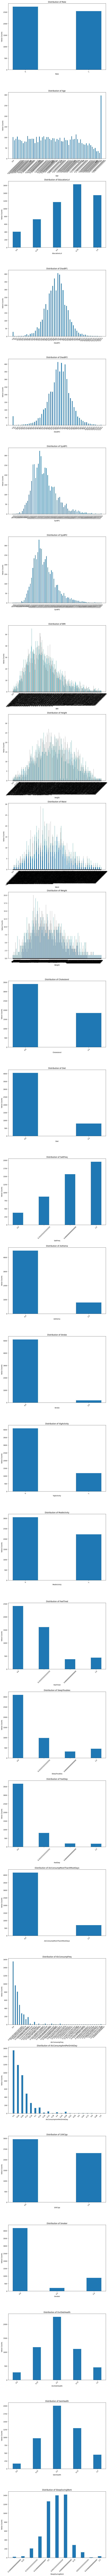

In [91]:
features = merged_df.columns

# Create subplots
num_features = len(features)
fig, axes = plt.subplots(num_features, 1, figsize=(10, 8 * num_features))  # Reduced the vertical size multiplier for a less tall figure

# Plot each feature's value counts
for i, feature in enumerate(features):
    value_counts = merged_df[feature].value_counts().sort_index()  # Sort the value counts by index
    axes[i].bar(value_counts.index.astype(str), value_counts.values, width=0.4)  # Convert index to string if necessary and adjust bar width
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Value Counts')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels to 45 degrees for better readability

# Adjust layout
plt.tight_layout()
plt.show()

In [92]:
# Drop SysBP1, SysBP2, DiasBP1, and DiasBP2 columns
merged_df.drop(columns=['SysBP1', 'DiasBP1'], inplace=True)
merged_df.head()

,Male,Age,EducationLvl,DiasBP2,SysBP2,BMI,Height,Waist,Weight,Cholesterol,...,SleepTroubles,FeelDep,AlcConsumpMoreThanXMostDays,AlcConsumpFreq,AlcConsumpAmtPerDrinkDay,100Cigs,Smoker,OvrDietHealth,GenHealth,SleepDuringWork
0,1,0.816667,0.50,74.0,102.0,0.294118,0.534226,0.436795,78.3,1.0,...,0.0,0.000000,1.0,0.002740,0.04,1.0,0.0,0.75,0.75,0.583333
1,1,0.566667,0.50,42.0,156.0,0.342711,0.616071,0.522573,89.5,1.0,...,0.0,0.000000,1.0,0.019178,0.16,1.0,0.5,0.50,0.25,0.750000
2,1,0.866667,0.75,80.0,146.0,0.350384,0.593750,0.540632,88.9,1.0,...,0.0,0.000000,0.0,0.000000,0.00,1.0,0.0,0.50,0.50,0.666667
4,0,0.883333,1.00,86.0,142.0,0.115090,0.401786,NaN,52.0,0.0,...,0.0,0.333333,0.0,0.000000,0.00,0.0,0.0,0.75,0.00,0.750000
5,1,0.600000,0.75,80.0,154.0,0.677749,0.346726,0.697517,105.0,1.0,...,1.0,1.000000,0.0,0.013699,0.04,1.0,0.0,0.00,0.00,0.416667


In [93]:
# Drop all rows that have null values in them
merged_df.dropna(inplace=True)
merged_df.shape

(4367, 27)

In [94]:
target_sys = merged_df['SysBP2']
target_dias = merged_df['DiasBP2']
train_df = merged_df.drop(columns=['SysBP2', 'DiasBP2'])

In [95]:
# # Drop the specified columns from train_df
# columns_to_drop = ['Height', 'Weight', 'Asthema', 'Stroke', 'FeelTired', 'SleepTroubles', 'FeelDep', 'AlcConsumpFreq', 'AlcConsumpAmtPerDrinkDay', 'SleepDuringWork']
# train_df.drop(columns=columns_to_drop, inplace=True)

In [96]:
# Assuming 'merged_df' is your DataFrame and 'target' is the column you want to predict
X = train_df
y_sys = target_sys  # Target variable
y_dias = target_dias

# Perform train-test split
X_train, X_test, y_train_sys, y_test_sys = train_test_split(X, y_sys, test_size=0.35, random_state=42)
X_train, X_test, y_train_dias, y_test_dias = train_test_split(X, y_dias, test_size=0.35, random_state=42)

print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 2838
Test set size: 1529


In [97]:
model_sys = LinearRegression()
model_dias = LinearRegression()

# Training the model
model_sys.fit(X_train, y_train_sys)

model_dias.fit(X_train, y_train_dias)

# Making predictions on the test set
y_pred_sys = model_sys.predict(X_test)
y_pred_dias = model_dias.predict(X_test)

# Evaluating the model
mse_sys = mean_squared_error(y_test_sys, y_pred_sys)
print(f"Mean Squared Error Sys: {mse_sys}")
mse_dias = mean_squared_error(y_test_dias, y_pred_dias)
print(f"Mean Squared Error Sys: {mse_dias}")

Mean Squared Error Sys: 257.7024601911604
Mean Squared Error Sys: 195.47438556745854


In [98]:
# Creating a DataFrame with the actual and predicted values
compare_df = pd.DataFrame({
    'Actual_SysBP': y_test_sys,
    'Predicted_SysBP': y_pred_sys,
    'Actual_DiasBP': y_test_dias,
    'Predicted_DiasBP': y_pred_dias
})

# Resetting the index if necessary (to ensure the indices of predictions match those of the actual values)
compare_df.reset_index(drop=True, inplace=True)

# Display the first few rows of the DataFrame to verify its contents
print(compare_df.head())

   Actual_SysBP  Predicted_SysBP  Actual_DiasBP  Predicted_DiasBP
0         112.0       108.548264           46.0         68.800470
1         116.0       124.531420           68.0         73.274833
2         108.0       126.313296           76.0         67.612280
3         118.0       119.827984           64.0         70.358304
4         126.0       115.740973           78.0         65.428758


In [111]:
def calculate_hypertension_old(df, feature_sys, feature_dias, feature_type):

    conditions = [
        (df[feature_sys] >= 180) | (df[feature_dias] >= 120),
        (df[feature_sys] >= 140) | (df[feature_dias] >= 90),
        (df[feature_sys] >= 130) | (df[feature_dias] >= 80),
        (df[feature_sys] >= 120),
        (df[feature_sys] < 120)
    ]

    choices = [1, 2, 3, 4, 5]

    df[feature_type] = np.select(conditions, choices, default=np.nan)


In [112]:
def calculate_hypertension(df, feature_sys, feature_dias, feature_type):
    # Define the condition for hypertension
    condition = (df[feature_sys] >= 130) | (df[feature_dias] >= 80)
    
    # Apply the condition and set the new feature_type column
    df[feature_type] = np.where(condition, 1, 0)
    
    return df

In [113]:
calculate_hypertension(compare_df, 'Actual_SysBP', 'Actual_DiasBP', 'Actual_Categorisation')
calculate_hypertension(compare_df, 'Predicted_SysBP', 'Predicted_DiasBP', 'Predicted_Categorisation')

,Actual_SysBP,Predicted_SysBP,Actual_DiasBP,Predicted_DiasBP,Actual_Categorisation,Predicted_Categorisation
0,112.0,108.548264,46.0,68.800470,0,0
1,116.0,124.531420,68.0,73.274833,0,0
2,108.0,126.313296,76.0,67.612280,0,0
3,118.0,119.827984,64.0,70.358304,0,0
4,126.0,115.740973,78.0,65.428758,0,0
...,...,...,...,...,...,...
1524,106.0,116.912338,70.0,68.986499,0,0
1525,102.0,112.019451,62.0,68.154705,0,0
1526,124.0,116.874325,74.0,69.014482,0,0
1527,154.0,121.465478,80.0,69.626521,1,0


In [114]:
def calculate_agreement_percentage(df, col1, col2):

    # Calculate the number of matches
    matches = (df[col1] == df[col2]).sum()
    
    # Calculate the total number of rows
    total_rows = df.shape[0]
    
    # Calculate the percentage of matches
    if total_rows > 0:
        percentage = (matches / total_rows) * 100
    else:
        percentage = 0  # To handle cases where the DataFrame might be empty
    
    return percentage

In [115]:
# Example usage:
# Assuming 'merged_df' is your DataFrame and contains the columns 'Actual_Categorisation' and 'Predicted_Categorisation'
percentage_match = calculate_agreement_percentage(compare_df, 'Actual_Categorisation', 'Predicted_Categorisation')
print(f"Percentage of matching values: {percentage_match}%")

Percentage of matching values: 66.77567037279267%


In [116]:
from IPython.display import display, HTML
display(HTML(compare_df.to_html(max_rows=100, max_cols=100, notebook=True)))

,Actual_SysBP,Predicted_SysBP,Actual_DiasBP,Predicted_DiasBP,Actual_Categorisation,Predicted_Categorisation
0,112.0,108.548264,46.0,68.800470,0,0
1,116.0,124.531420,68.0,73.274833,0,0
2,108.0,126.313296,76.0,67.612280,0,0
3,118.0,119.827984,64.0,70.358304,0,0
4,126.0,115.740973,78.0,65.428758,0,0
5,166.0,128.950622,46.0,72.601153,1,0
6,140.0,124.079614,72.0,69.095416,1,0
7,114.0,114.060938,72.0,67.704228,0,0
8,118.0,134.708489,70.0,70.050088,0,1
9,114.0,132.188563,70.0,68.695778,0,1


OLD

In [104]:
# Define the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred = y_pred_prob >= 0.5

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

# Assuming you have already trained the logistic regression model and have X_val and y_val ready
# Make predictions on the validation set
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred = y_pred_prob >= 0.5

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=True, xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix Heatmap")
plt.show()

# Extract the values from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# Calculate the percentages
total = tn + fp + fn + tp
false_positive_percentage = (fp / total) * 100
true_positive_percentage = (tp / total) * 100
false_negative_percentage = (fn / total) * 100
true_negative_percentage = (tn / total) * 100

# Create a DataFrame with the true labels, predicted probabilities, and whether the prediction was correct
df_predictions = pd.DataFrame({
    'true': y_test,
    'pred_prob': y_pred_prob,
    'correct': y_test == y_pred
})

# Create a histogram of predicted probabilities, colored by whether the prediction was correct
plt.figure(figsize=(10, 6))
plt.hist([df_predictions.loc[df_predictions['correct'], 'pred_prob'], df_predictions.loc[~df_predictions['correct'], 'pred_prob']], 
         bins=np.linspace(0, 1, 21), stacked=False, color=['skyblue', 'red'], label=['Correct', 'Incorrect'])
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities')
plt.legend()
plt.show()

NameError: name 'y_train' is not defined

Accuracy: 0.68


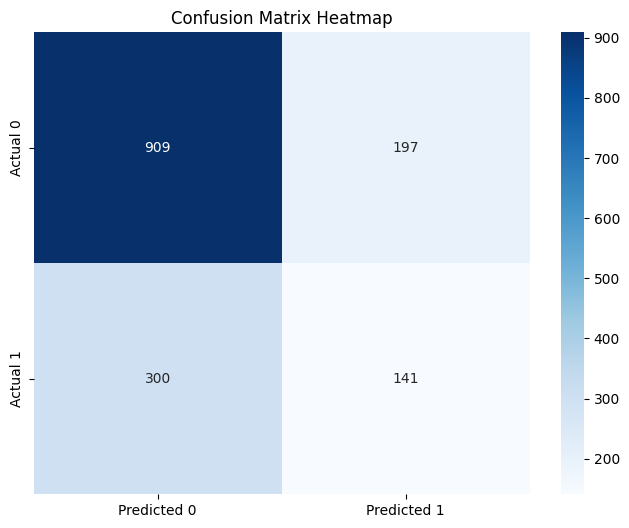

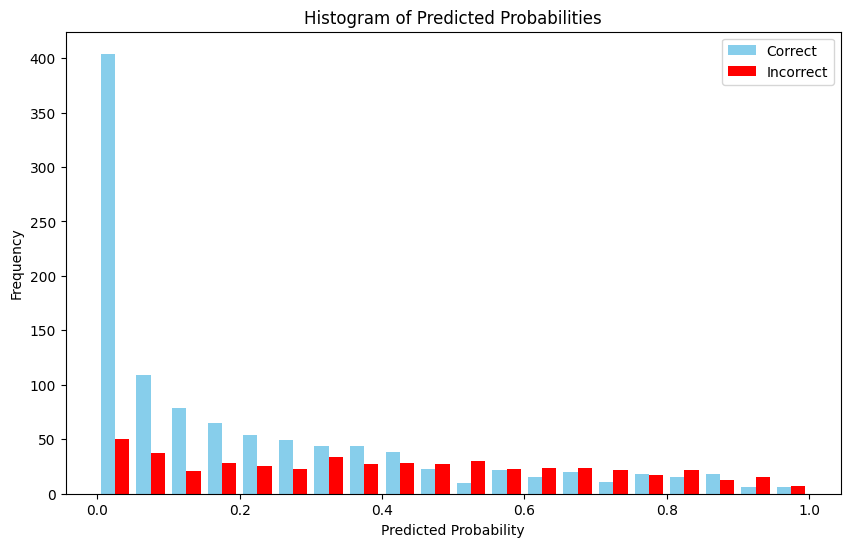

In [ ]:
# Define the XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Make predictions on the test set
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred = y_pred_prob >= 0.5

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=True, xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix Heatmap")
plt.show()

# Extract the values from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# Calculate the percentages
total = tn + fp + fn + tp
false_positive_percentage = (fp / total) * 100
true_positive_percentage = (tp / total) * 100
false_negative_percentage = (fn / total) * 100
true_negative_percentage = (tn / total) * 100

# Create a DataFrame with the true labels, predicted probabilities, and whether the prediction was correct
df_predictions = pd.DataFrame({
    'true': y_test,
    'pred_prob': y_pred_prob,
    'correct': y_test == y_pred
})

# Create a histogram of predicted probabilities, colored by whether the prediction was correct
plt.figure(figsize=(10, 6))
plt.hist([df_predictions.loc[df_predictions['correct'], 'pred_prob'], df_predictions.loc[~df_predictions['correct'], 'pred_prob']], 
         bins=np.linspace(0, 1, 21), stacked=False, color=['skyblue', 'red'], label=['Correct', 'Incorrect'])
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities')
plt.legend()
plt.show()

Accuracy: 0.71


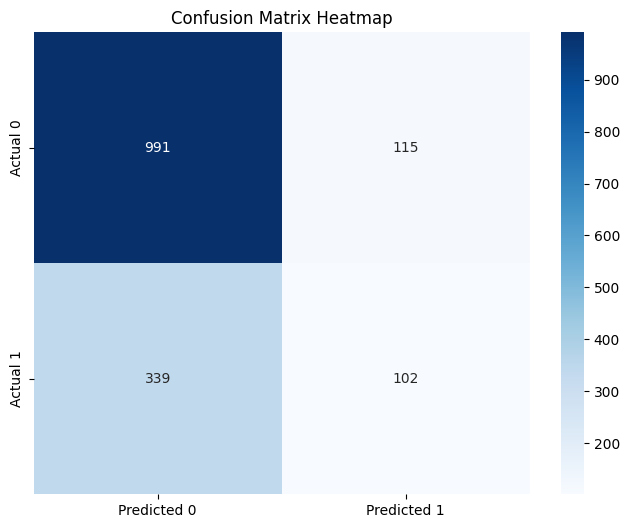

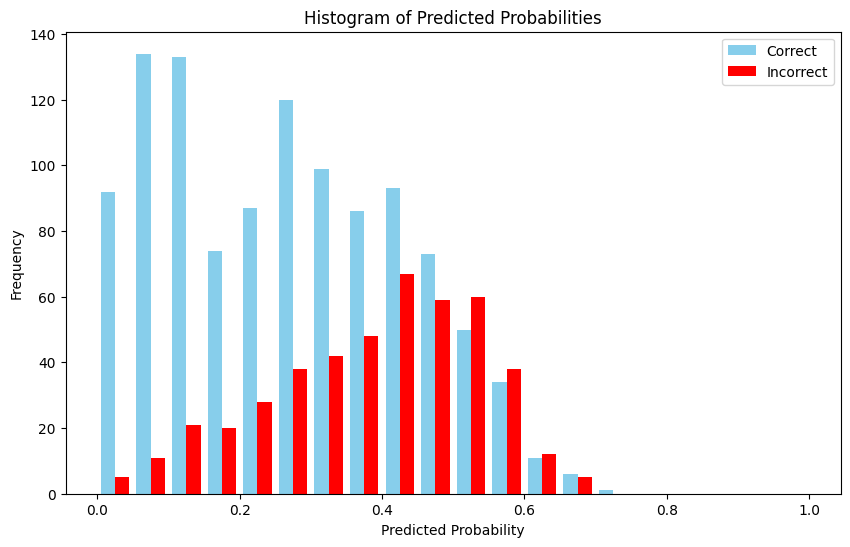

In [ ]:
# Define the Random Forest model
model = RandomForestClassifier()

# Fit the model
model.fit(X_train, y_train)


# Make predictions
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Make predictions on the test set
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred = y_pred_prob >= 0.5

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=True, xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix Heatmap")
plt.show()

# Extract the values from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# Calculate the percentages
total = tn + fp + fn + tp
false_positive_percentage = (fp / total) * 100
true_positive_percentage = (tp / total) * 100
false_negative_percentage = (fn / total) * 100
true_negative_percentage = (tn / total) * 100

# Create a DataFrame with the true labels, predicted probabilities, and whether the prediction was correct
df_predictions = pd.DataFrame({
    'true': y_test,
    'pred_prob': y_pred_prob,
    'correct': y_test == y_pred
})

# Create a histogram of predicted probabilities, colored by whether the prediction was correct
plt.figure(figsize=(10, 6))
plt.hist([df_predictions.loc[df_predictions['correct'], 'pred_prob'], df_predictions.loc[~df_predictions['correct'], 'pred_prob']], 
         bins=np.linspace(0, 1, 21), stacked=False, color=['skyblue', 'red'], label=['Correct', 'Incorrect'])
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities')
plt.legend()
plt.show()